# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
#supress alll warings
import warnings
warnings.filterwarnings("ignore")

### Loading the heart dataset and getting to know the dataset

In [2]:
# Load the heart dataset
heart_data = pd.read_csv('E:/python/internship/heart.csv')

# Number of rows and columns in this dataset
print("Shape of the dataset:", heart_data.shape)

# Getting the statistical measures of the data
print("Statistical Summary:\n", heart_data.describe())

# Distribution of the target column
print("Target column value counts:\n", heart_data['target'].value_counts())  # Replace 'Outcome' with 'target'

# Compare mean values for each feature grouped by target
print("Mean values grouped by target:\n", heart_data.groupby('target').mean())  # Replace 'Outcome' with 'target'

# Separating the data and labels
X = heart_data.drop(columns='target', axis=1)  # Replace 'Outcome' with 'target'
y = heart_data['target']  # Replace 'Outcome' with 'target'

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Print the shapes of the datasets
print("Shapes of datasets:\n")
print("Features (X):", X.shape)
print("Training Features (X_train):", X_train.shape)
print("Testing Features (X_test):", X_test.shape)




Shape of the dataset: (303, 14)
Statistical Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604 

### PERFORM DATA CLEANING AND HANDLE MISSING VALUES

In [3]:

# Check for missing values in the dataset
missing_values = heart_data.isnull().sum()

# Check for invalid values (e.g., zero values in non-zero fields)
invalid_values_summary = (heart_data == 0).sum()

missing_values, invalid_values_summary


(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
 age           0
 sex          96
 cp          143
 trestbps      0
 chol          0
 fbs         258
 restecg     147
 thalach       0
 exang       204
 oldpeak      99
 slope        21
 ca          175
 thal          2
 target      138
 dtype: int64)

In [4]:
# Inspect column names
print("Columns in the dataset:\n", heart_data.columns)

# Compare mean values for each feature by target
grouped = heart_data.groupby('target').mean()  # Replace 'Outcome' with 'target'
print("Mean values grouped by target:\n", grouped)

# Replace invalid zero values with the mean for specific columns
# Replace these with actual column names in heart.csv
columns_to_impute = ['chol', 'trestbps', 'thalach']  # Adjust these based on column names in heart.csv

for column in columns_to_impute:
    if column in heart_data.columns:
        mean_value = heart_data[column].mean()
        heart_data[column] = heart_data[column].replace(0, mean_value)
    else:
        print(f"Column '{column}' not found in the dataset!")

# Verify if invalid values are replaced
print("Number of zero values in each column:\n", (heart_data == 0).sum())


Columns in the dataset:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Mean values grouped by target:
               age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212  
Number of zero values in each column:
 age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach 

### Perform EDA to understand the data.

Statistical Summary:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std  

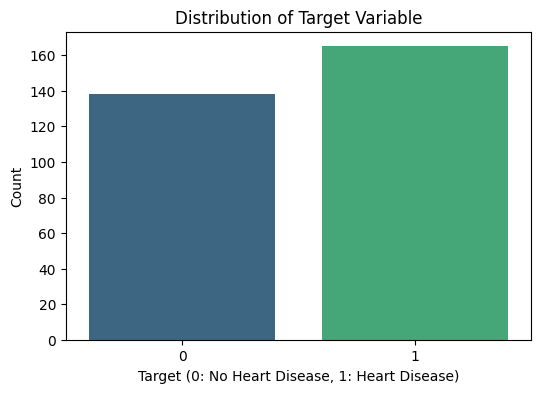

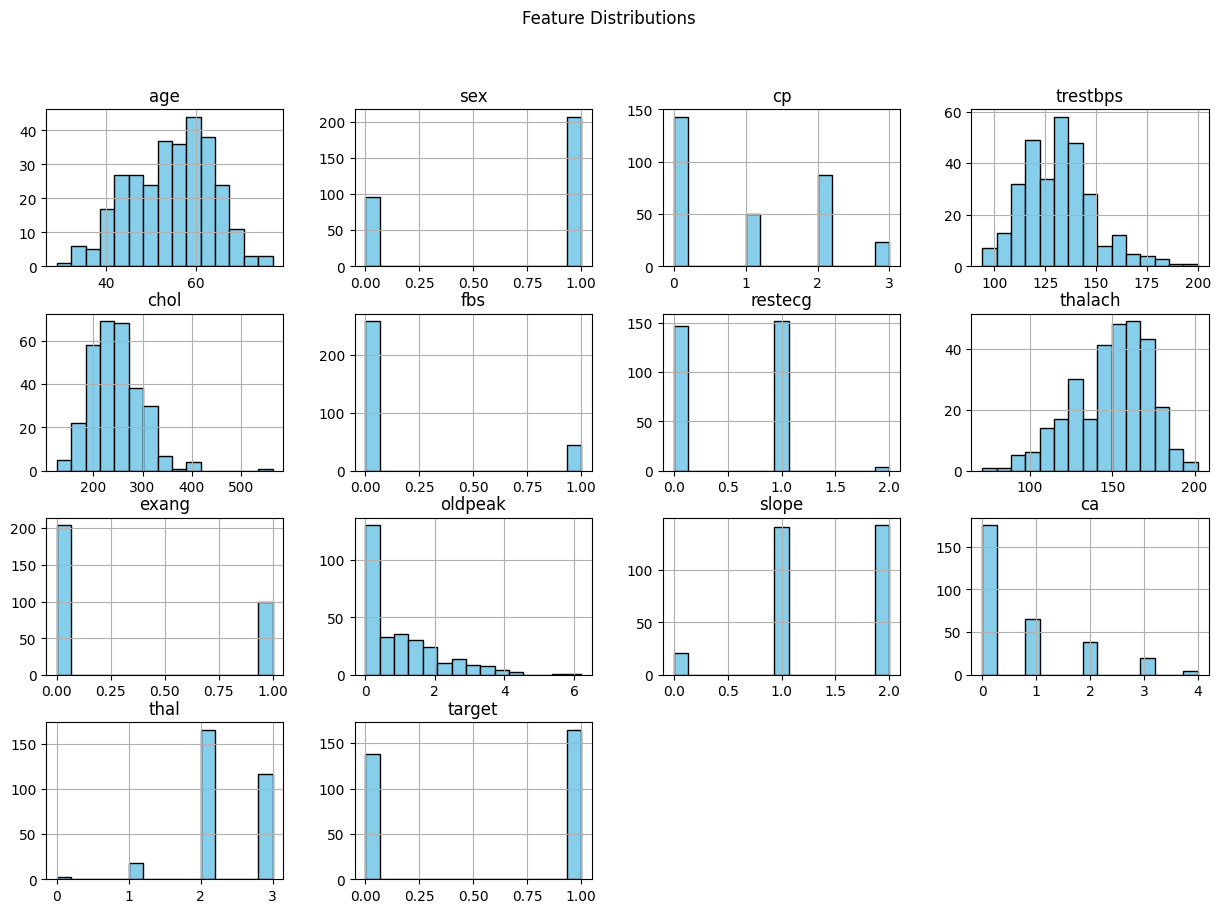

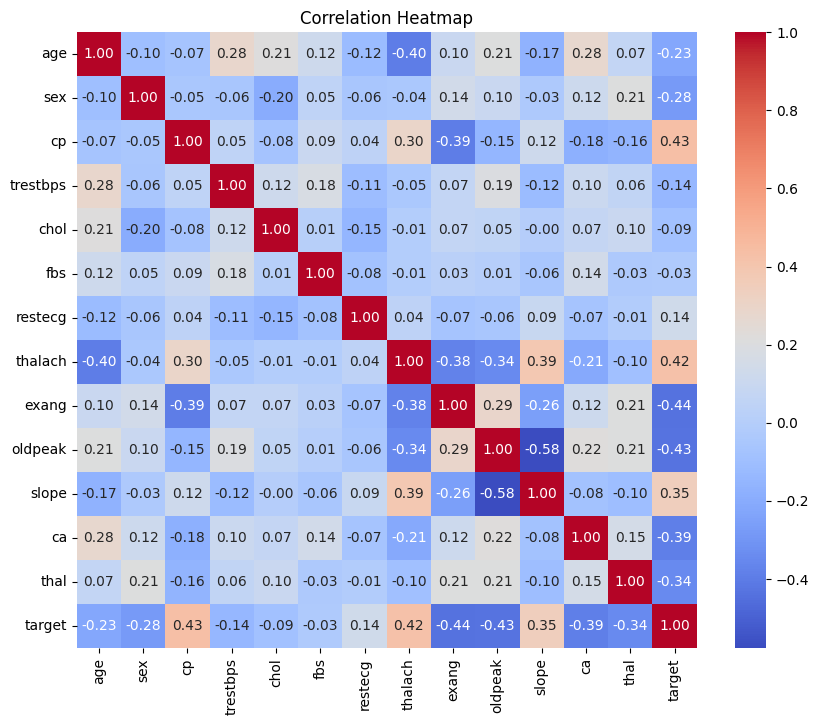

In [5]:
# Statistical summary
statistical_summary = heart_data.describe()
print("Statistical Summary:\n", statistical_summary)

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data, palette='viridis')  # Replace 'Outcome' with 'target'
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.show()

# Visualize distributions for all numerical features
heart_data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

### Split data into training, validation, and test sets

In [6]:
# Print the shape of the dataset
print("Dataset shape:", heart_data.shape)

# Separate features and target variable
X = heart_data.drop(columns='target')  # Features
y = heart_data['target']  # Target variable

# First split: Training and temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Verify the sizes of the splits
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Dataset shape: (303, 14)
Training set: (212, 13), Validation set: (45, 13), Test set: (46, 13)


###  MODEL and ACCURACY 

In [7]:
classifier = svm.SVC(kernel='linear')

#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('\nAccuracy score of the training data : ', training_data_accuracy)


# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
print('Accuracy score of the test data : ', test_data_accuracy ,'\n')


Accuracy score of the training data :  0.8773584905660378
Accuracy score of the test data :  0.7391304347826086 



### Model Selection ,Building and Training 

In [9]:
# Initialize models
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Ensure convergence
rf_clf = RandomForestClassifier(random_state=42)

# Train Logistic Regression
log_reg.fit(X_train, y_train)
y_val_pred_lr = log_reg.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_val_pred_lr)

# Train Random Forest
rf_clf.fit(X_train, y_train)
y_val_pred_rf = rf_clf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

# Compare Validation Accuracies
print("Logistic Regression Validation Accuracy:", lr_accuracy)
print("Random Forest Validation Accuracy:", rf_accuracy)

# Evaluate the best model on the test set
best_model = rf_clf if rf_accuracy > lr_accuracy else log_reg
y_test_pred = best_model.predict(X_test)

# Test Set Performance
print("\nTest Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Logistic Regression Validation Accuracy: 0.7555555555555555
Random Forest Validation Accuracy: 0.8

Test Set Performance:
Accuracy: 0.782608695652174
Confusion Matrix:
 [[15  6]
 [ 4 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.78      0.84      0.81        25

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.78      0.78      0.78        46



In [10]:
# Feature Engineering
from sklearn.feature_selection import RFE

rfe_model = RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)
rfe_model.fit(X_train, y_train)

print("Selected Features:", list(X.columns[rfe_model.support_]))


## Apply Cross-Validation
# Evaluate Random Forest with cross-validation
cv_scores_rf = cross_val_score(rfe_model, X, y, cv=5, scoring='accuracy')

print("\nRandom Forest Cross-Validation Accuracy:", cv_scores_rf.mean(),'\n')

Selected Features: ['age', 'cp', 'thalach', 'oldpeak', 'thal']

Random Forest Cross-Validation Accuracy: 0.7489617486338798 



In [11]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have heart Disease")

else:
  print("The Person has heart")


[0]
The Person does not have heart Disease


In [12]:

import pickle
filename = 'heart_model.sav'
pickle.dump(classifier, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('heart_model.sav', 'rb'))
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
